# MURCHIE85 TWITTER PROCESSING 

&#x1F34E; **TOPIC = #BREXIT**


## AUTOMATED RESEARCH SUMMARY
    

![image](https://static.independent.co.uk/s3fs-public/thumbnails/image/2019/03/29/17/brexit-parliament-protests-3.jpg)

<br>


<div class="alert alert-block alert-info">
<b> This repo is for pulling metrics on a given keyword or hashtag and performs a series of reporting and analysis.</b>
</div>


<br>


   


![image](BIO.png)


Majority Remain            |  Majority Tory
:-------------------------:|:-------------------------:
![](LEAVE.png)  |  ![](COMPARE.png)

<br>
<br>


The majority of tweeters on this topic describe themselves in their Bio with **'BREXIT'** , **'EU'**, **'UK'**  and **'PROUD'**. <br>
Related terms such as **REFERENDUM** and **HARD BREXIT** no longer rank in the top 20.


The top most popular words tweeted are :


- **BREXIT**
- **PARTY**
- **VOTE**
- **LABOUR**
- **PEOPLE**
- **EU**
- **MAY**
- **ELECTION**
- **FARAGE**
- **TORY**



![image](TWEETS.png)
    
    
### SENTIMENT ANALYSIS
VIEWS WERE : **SUBJECTIVE**  (58.5%) & **NEGATIVELY-SUBJECTIVE** (16.5%) **OBJECTIVE** (25%)

### TWEET SAMPLE 

Random value picked from array: 


<div class="alert alert-block alert-info">
<b>@dannydorling:</b> The lowest support for the Brexit party is among those households in the UK living on the lowest of incomes. The greatest support in found among those households with a household income of £40,000 a year or more; but, even among, them the Conservatives now poll in fourth place...

</div>

### MOST RETWEETED

Technically the most popular tweet (note, this is not always the source of the hashtag)

<div class="alert alert-block alert-danger">
<b>@derekjames150 (past 24 hours)</b>  Watching Andrew Marr's show this morning, the three women reviewing the papers were all right extolling the "virtues" of Nigel Farage. It was just like watching Fox News' "Fox and Friends" programme. The BBC is now very definitely the British Brexit Corporation.
</div>



### ANALYSIS CRITIQUE

<br>

This analysis is from the #Brexit tweets in the past 24 hours, #Tory's appear to be tweeting in higher numbers than any other. Of the people tweeting about #Brexit, a large majority actually use #Brexit in their Bio description. We can see that in the description, Leave appears more than remain. Conversly of the tweets #Referendum is just in the top 20 *i.e. people are not talking about this as muc has #Election.*


<br>


No information was removed or specially selected for apart from gramatically netural terms listed in code below i.e. `delx['THE']` removed all `the` terms from word count. There are limitations to this research covered in technical detail below, but the key issue being this report was taken after the hashtag stopped trending, it peaked at 500 tweets per minute - thus whilst this data is the complete overview, it did not show how opinions changed over time. I.e. were there changes in objectivity post completion of tweet threads.



<br>


### CONCLUSION & EXTERNAL ANALYSIS

*This is my (Adam McMurchie's) opinion on the data from the tweets, it serves as no objective truth.Since the tweets themselves are a mixture of fact & opinion. 

<br>

WILL BE UPDATED IN NEXT  24 HOURS 


<br><br>

**RECOMMENDATIONS** WILL BE UPDATED IN NEXT  24 HOURS 


<br>

# TECHNICAL WALKTHROUGH 


## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [5]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [ ]:
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import clear_output
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []

progress = 0
max_count = 10000

f = IntProgress(description='Processing:',min=0, max=max_count,) # instantiate the bar
display(f) # display the bar



class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        progress = (f.value/max_count) * 100
        progress = format(progress, '.2f')
        print('Progress: ' + str(progress) + " %")
        clear_output(wait=True)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

#print('Pulling down data.....')
stream.filter(track=["Brexit"],languages=["en"])


In [3]:
# HISTORICAL DATA SWITCHED OFF (IF YOU SWITCH ON, THEN SWITCH STREAM OFF ABOVE)


"""

from ipywidgets import IntProgress
from IPython.display import display
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)









status_array = []
LOOP_COUNT = 0
max_count = 10000


# Search for 10 most recent tweets about "Brexit"
tweets = tweepy.Cursor(api.search, q='SexStrike', count=int(max_count))

# TRACK PROGRESS
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar


print('Pulling down data.....')                    
for tweet in tweets.items(int(max_count)):
    f.value+=1
    time.sleep(.1)
    status_array.append(tweet._json)



print('Processing complete')

"""

Pulling down data.....
Processing complete


'\n\nf = IntProgress(min=0, max=max_count) # instantiate the bar\ndisplay(f) # display the bar\n\n\n\nclass StreamListener(tweepy.StreamListener):\n    tweet_number=0   # class variable\n    \n\n\n    def on_status(self, status):\n        self.max_tweets=max_count # max number of tweets\n        self.tweet_number+=1   \n        f.value += 1 # signal to increment the progress bar\n        time.sleep(.1)\n        status_array.append(status._json)\n\n        if self.tweet_number>=self.max_tweets:\n            sys.exit(\'PROCESSING COMPLETE : \'+str(self.max_tweets)+\' tweets processed.\')\n\n        \n    def on_error(self, status_code):\n        if status_code == 420:\n            return False\n\nstream_listener = StreamListener()\nstream = tweepy.Stream(auth=api.auth, listener=stream_listener)\n\nprint(\'Pulling down data.....\')\nstream.filter(track=["#Alabama"],languages=["en"])\n\n'

# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [13]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

data/streamout-2019-05-19 09:23:52.968752.txt


# STREAM METADATA

In [36]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
#print('An example element looks like: ')
#print(status_array[0])

Number of records
5498

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])



# REPORT GENERATION

In [15]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])



=========================SAMPLE OUTPUT================================
************************************************************
RT @BremainInSpain: Brexit Party fundraiser is ‘Posh George’, once jailed in US after money-laundering sting 

https://t.co/SRma2PQaJd
------------------------------
Sun May 19 08:19:50 +0000 2019
------------------------------
𝔃𝓲𝓴𝓸𝓶𝓸 𝔃𝓲𝓶  🐘 🇿🇼🏴󠁧󠁢󠁳󠁣󠁴󠁿🇪🇺
------------------------------
Africa, Scotland, EU
------------------------------
Funtoo user & supporter. SNP. Very old OU student STEM. p/t student Arabic & Russian so R ≠ Я. Play cricket & hug an #Elephant. Freedom & Peace to all #Yazidi.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


## USER DESCRIPTION NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [238]:

WORDONE='tory'
WORDTWO='labour'
WORDTHREE='libdem'
WORDFOUR = 'ukip'
WORDFIVE = 'Green party'
WORDSIX = 'greens'
WORDSEVEN = 'referendum'
WORDEIGHT = 'leave'
WORDNINE = 'remain'
WORDTEN = 'farage'




WORDONE= WORDONE.upper()
WORDTWO= WORDTWO.upper()
WORDTHREE=WORDTHREE.upper()
WORDFOUR = WORDFOUR.upper()
WORDFIVE = WORDFIVE.upper()
WORDSIX = WORDSIX.upper()
WORDSEVEN = WORDSEVEN.upper()
WORDEIGHT = WORDEIGHT.upper()
WORDNINE = WORDNINE.upper()
WORDTEN = WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0


linecount = 0
APPENDED_DESCRIPTION = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = str(status_array[x]['user']['description']).upper()
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    
    
    if str(description).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(description).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(description).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(description).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(description).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(description).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(description).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(description).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(description).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(description).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
      
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT))
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT))
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT))
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT))
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT))
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT))
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT))
print('Total Number of Records: ' + str(linecount)) 


APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('#', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('.', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')

Total count of words - TORY :181
Total count of words - LABOUR :141
Total count of words - LIBDEM :40
Total count of words - UKIP :33
Total count of words - GREEN PARTY :14
Total count of words - GREENS :6
Total count of words - REFERENDUM :13
Total count of words - LEAVE :108
Total count of words - REMAIN :184
Total count of words - FARAGE :8
Total Number of Records: 5498


## BESPOKE VISUALIZATION

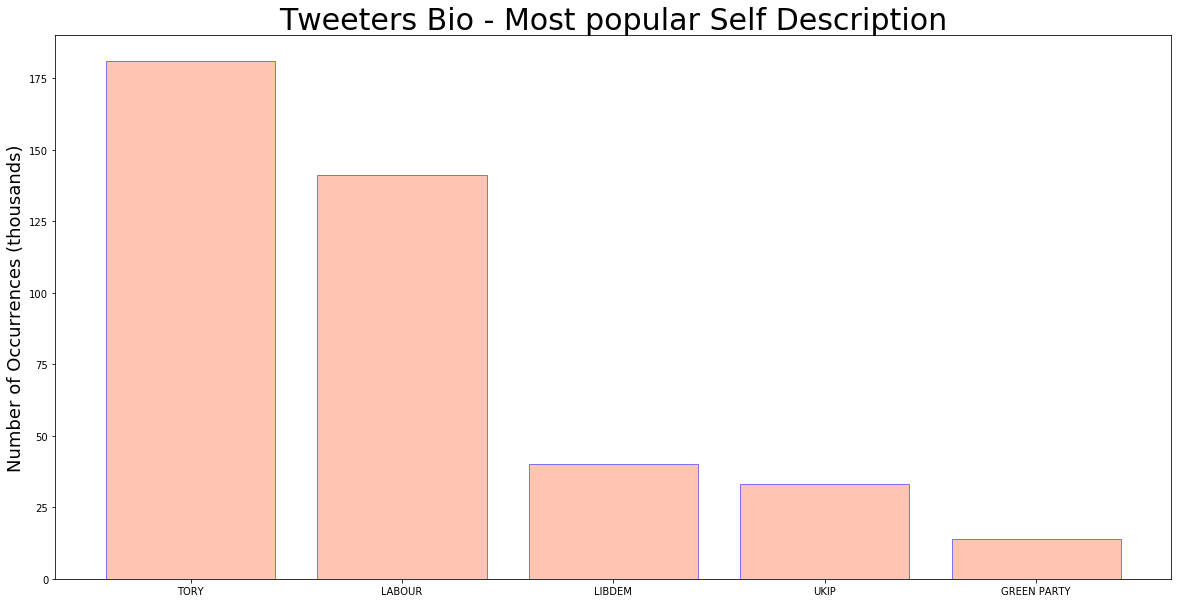

In [242]:

B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal')
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")
plt.savefig("COMPARE")
plt.show()

In [153]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE']

top_bio_desc = OrderedDict(x.most_common(20))
print(top_bio_desc)


OrderedDict([('BREXIT', 468), ('VIEWS', 253), ('LOVE', 251), ('EU', 213), ('POLITICS', 201), ('PARTY', 165), ('FAN', 156), ('PROUD', 149), ('UK', 148), ('MUSIC', 144), ('FBPE', 142), ('MEMBER', 138), ('PEOPLE', 137), ('COUNTRY', 132), ('SUPPORTER', 130), ('EUROPEAN', 128), ('LOVER', 114), ('EUROPE', 109), ('HATE', 108), ('WORLD', 107)])


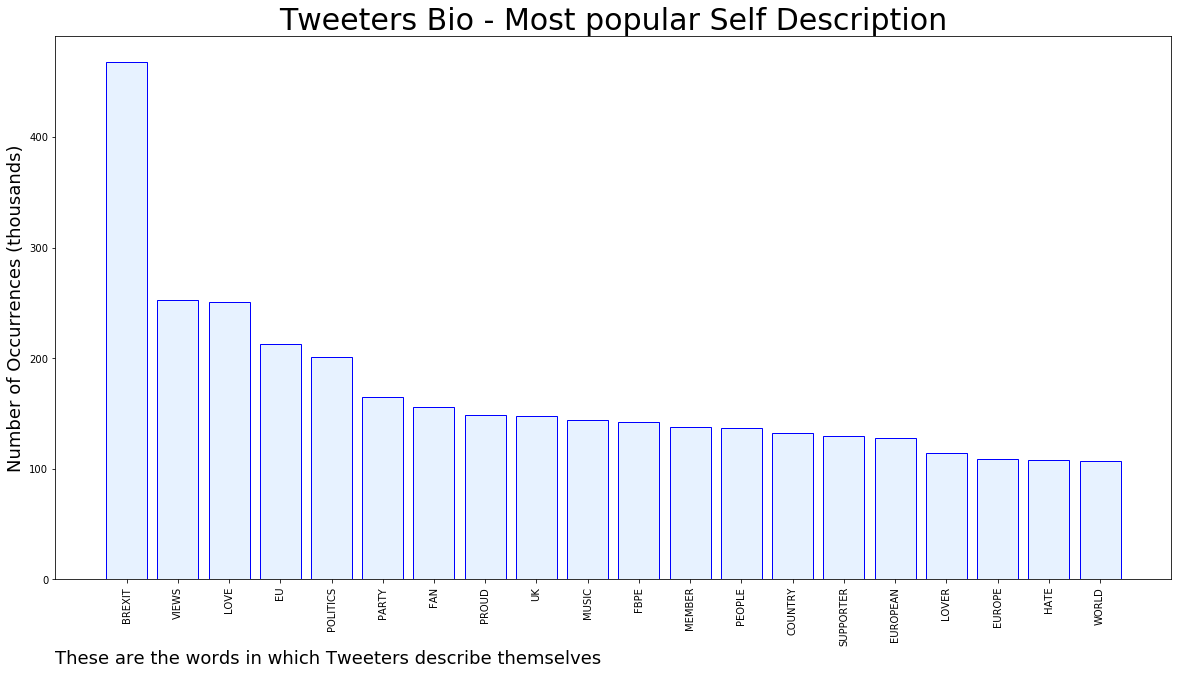

In [167]:
import matplotlib.pyplot as plt

D = top_bio_desc

plt.bar(range(len(D)), list(D.values()), align='center', color=(0.1, 0.5, 1, 0.1),  edgecolor='blue')

plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("BIO", bbox_inches="tight")
plt.show()

## TWEET NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency,  **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [155]:
WORDONE='Brexit'
WORDTWO='Tory'
WORDTHREE='Labour'

WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 



WORDONE= WORDONE.upper()
WORDTWO= WORDTWO.upper()
WORDTHREE=WORDTHREE.upper()



linecount = 0
APPENDED_TEXT = ""


for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = str(status_array[x]['text']).upper()
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1

    if str(text).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1

    if str(text).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total Number of Records: ' + str(linecount))
APPENDED_TEXT = APPENDED_TEXT.replace('#', '')
APPENDED_TEXT = APPENDED_TEXT.replace('.', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')


Total count of words - BREXIT :3309
Total count of words - TORY :293
Total count of words - LABOUR :757
Total Number of Records: 5498


In [156]:
len(APPENDED_TEXT)

703038

In [157]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE']


top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('BREXIT', 2748), ('PARTY', 1281), ('VOTE', 828), ('LABOUR', 684), ('PEOPLE', 364), ('EU', 319), ('MAY', 269), ('ELECTION', 267), ('FARAGE', 267), ('VOTING', 236), ('DEAL', 226), ('TORIES', 219), ('UK', 200), ('VOTERS', 197), ('LIB', 194), ('ELECTIONS', 193), ('TORY', 192), ('REMAIN', 183), ('NIGEL', 171), ('REFERENDUM', 171)])


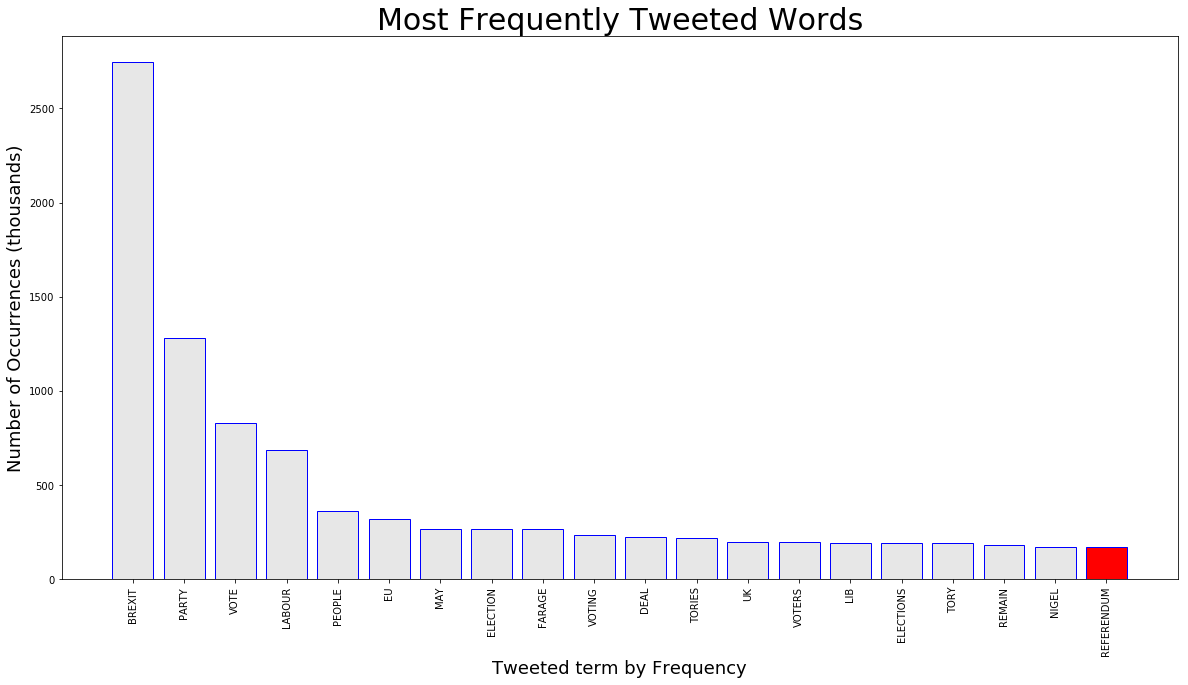

In [158]:
import matplotlib.pyplot as plt

E = top_tweets

color_last = [(0.1, 0.1, 0.1, 0.1), (0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),(0.1, 0.1, 0.1, 0.1),'red']
color = (0.1, 0.1, 0.1, 0.1)
plt.bar(range(len(E)), list(E.values()), align='center', color=color_last,  edgecolor='blue')

plt.xticks(range(len(E)), list(E.keys()), rotation='vertical')
plt.title("Most Frequently Tweeted Words", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('Tweeted term by Frequency', fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("TWEETS", bbox_inches="tight")
plt.show()


# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [6]:
from textblob import TextBlob
import tweepy


In [7]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [8]:
public_tweets = api.search('Brexit')

In [9]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')
    
print('objective_tweets : '+str(objective_tweet))
print('subjective_tweets : '+str(subjective_tweet))
print('negitively_subjective tweets: '+str(negitively_subjective))

Starmer blames 'wannabe Tory leaders' for Brexit talks failure
https://t.co/DG5Ef2G2kk
Sentiment(polarity=-0.3166666666666667, subjectivity=0.3)
Negatively subjective


RT @CrispinBlunt: Support  May’s deal, ergo drive DUP support away, but we mustn’t have early election.  Spot the problem with this thesis?…
Sentiment(polarity=0.1, subjectivity=0.3)
Subjective


These are your voting preferences in the EU elections:

LibDems - Pro EU anti Brexit

Greens    - Pro EU anti Brexi… https://t.co/LAb7xfpwuC
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @JolyonMaugham: By pretending cheating doesn't matter, by talking of the "will of the people", by asserting there's a "good Brexit", by…
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Subjective


RT @TheGreenParty: Well said @MollyMEP 👏👏👏

Say no to Brexit and no to climate change. Vote Green on Thursday 🗳️ https://t.co/QjImNncu22
Sentiment(polarity=-0.2, subjectivity=0.3)
Negatively subjective


RT @petertimmins3: Does an

# SAMPLE

In [19]:
status_array[3]['text']

'All MSM news outlets are in full overdrive today with anti Brexit guests. This is the last weekend to get the direc… https://t.co/7YJQUxtzKT'

In [20]:
retweet_array= []
for current in range(0, len(status_array)):
    retweet_array.append(status_array[current]['retweet_count'])
    
print('length of retweeted array: ' + str(len(retweet_array)))
most_retweeted = max(retweet_array)
print("most number of retweets: " + str(most_retweeted) + " at index " + str(retweet_array.index(max(retweet_array))))
print('The person who tweeted it was ' + str(status_array[retweet_array.index(max(retweet_array))]['user']['screen_name']))
print('Their screename is" ' + str(status_array[retweet_array.index(max(retweet_array))]['user']['name']))
print('There tweet was : ')
print(status_array[retweet_array.index(max(retweet_array))]['text'])

length of retweeted array: 1318
most number of retweets: 0 at index 0
The person who tweeted it was KimSussex3
Their screename is" Kim Sussex#FBPE
There tweet was : 
RT @derekjames150: Watching Andrew Marr's show this morning, the three women reviewing the papers were all right extolling the "virtues" of…


In [21]:
status_array[retweet_array.index(max(retweet_array))]['text']

'RT @derekjames150: Watching Andrew Marr\'s show this morning, the three women reviewing the papers were all right extolling the "virtues" of…'

0